In [1]:
import cv2
import math
videoFile = "example.mp4"
cap = cv2.VideoCapture()
cap.open(videoFile)

True

In [2]:
fs = [ ]
for i in range(100):
    for j in range(20):
        r, f = cap.read()
    fs.append(f)
    

In [3]:
len(fs)

100

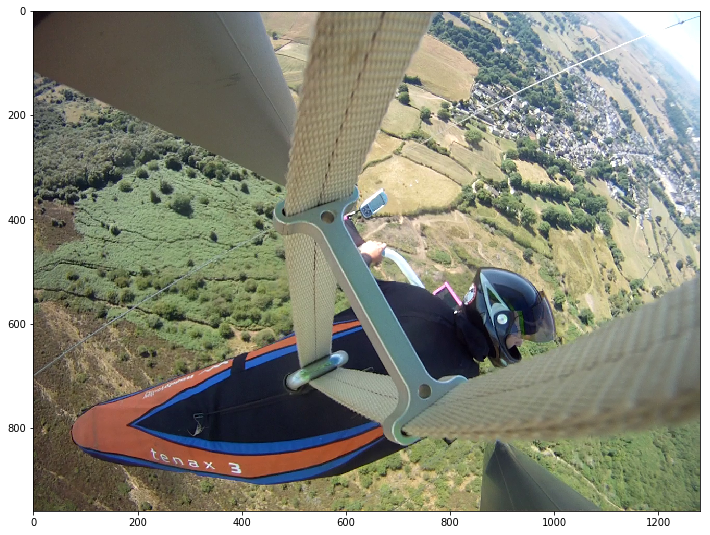

In [93]:
plt.figure(figsize=(12,9.2))
plt.imshow(cv2.cvtColor(fs[6], cv2.COLOR_BGR2RGB))


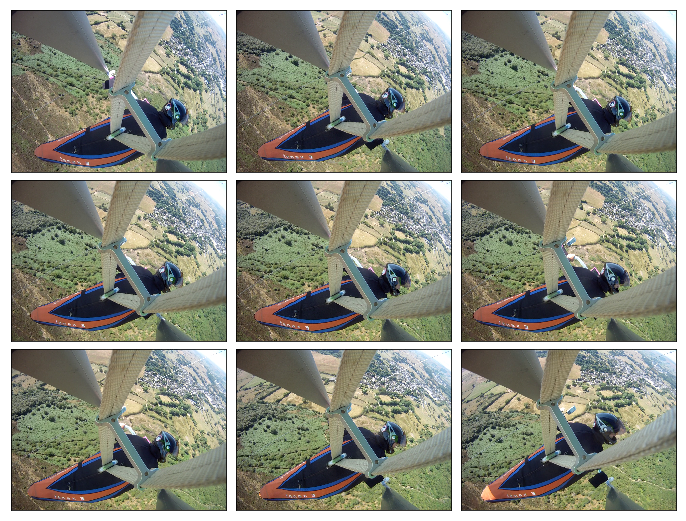

In [67]:
plt.figure(figsize=(12,9.2))
import matplotlib.gridspec as gridspec
gs1 = gridspec.GridSpec(3, 3)
gs1.update(wspace=0.025, hspace=0.05)

for i in range(9):
    #a = plt.subplot(3,3,i+1)
    a = plt.subplot(gs1[i])
    a.get_xaxis().set_visible(False)
    a.get_yaxis().set_visible(False)
    plt.imshow(cv2.cvtColor(fs[i+1], cv2.COLOR_BGR2RGB))


In [104]:
def rect25(fs, i00, i01, i10, i11):
    plt.figure(figsize=(12,12))
    import matplotlib.gridspec as gridspec
    gs1 = gridspec.GridSpec(5, 5)
    gs1.update(wspace=0.025, hspace=0.05)

    for i in range(25):
        a = plt.subplot(gs1[i])
        a.get_xaxis().set_visible(False)
        a.get_yaxis().set_visible(False)
        f = fs[i+1]
        f = f[i00:i01, i10:i11, :]
        plt.imshow(cv2.cvtColor(f, cv2.COLOR_BGR2RGB))


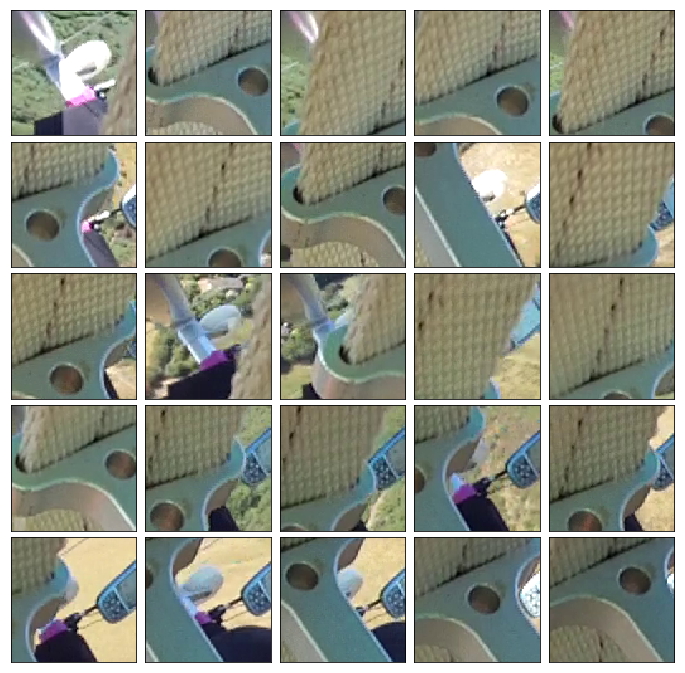

In [106]:
rect25(fs, 330, 430, 540, 640)  # left wheel

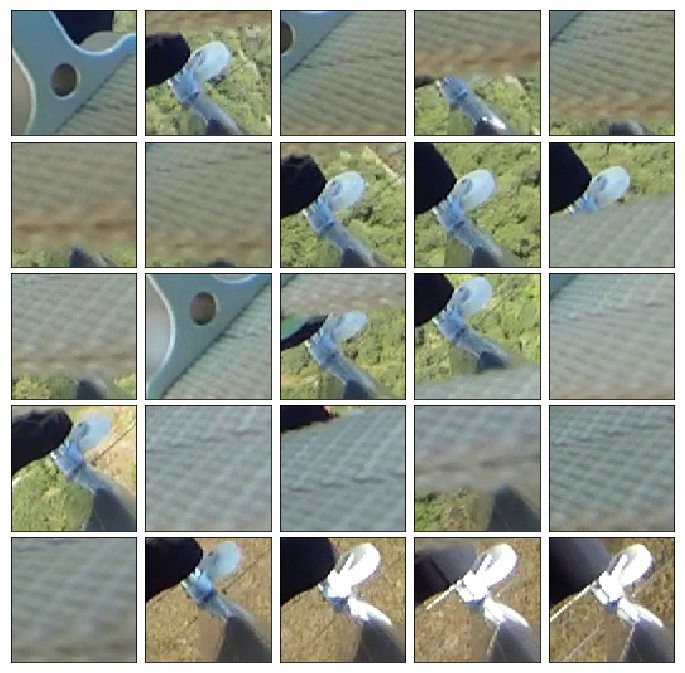

In [107]:
rect25(fs, 740, 840, 840, 940)  # right wheel

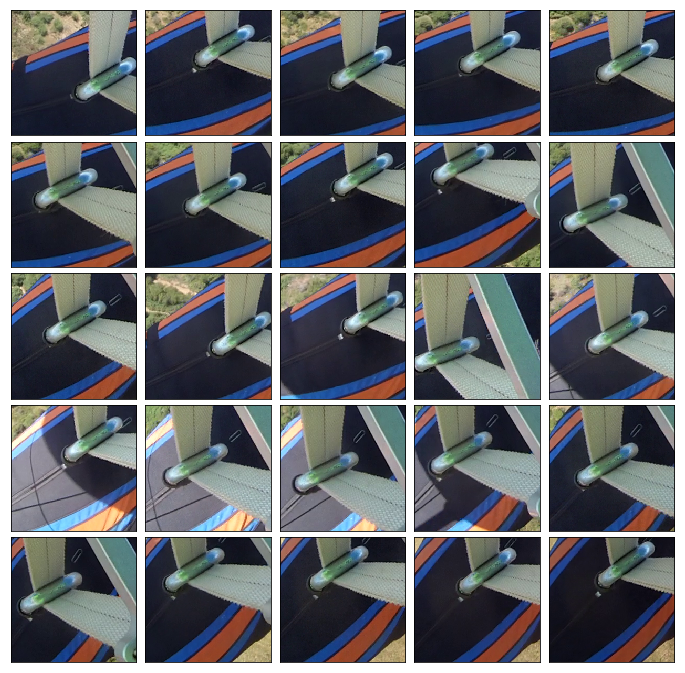

In [111]:
rect25(fs, 600, 840, 440, 680)  # krab

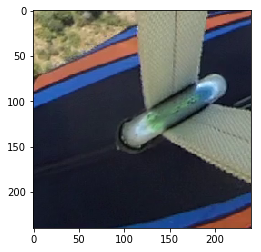

In [113]:
f = fs[3]
i00, i01, i10, i11 = 600, 840, 440, 680
f = f[i00:i01, i10:i11, :]
plt.imshow(cv2.cvtColor(f, cv2.COLOR_BGR2RGB))


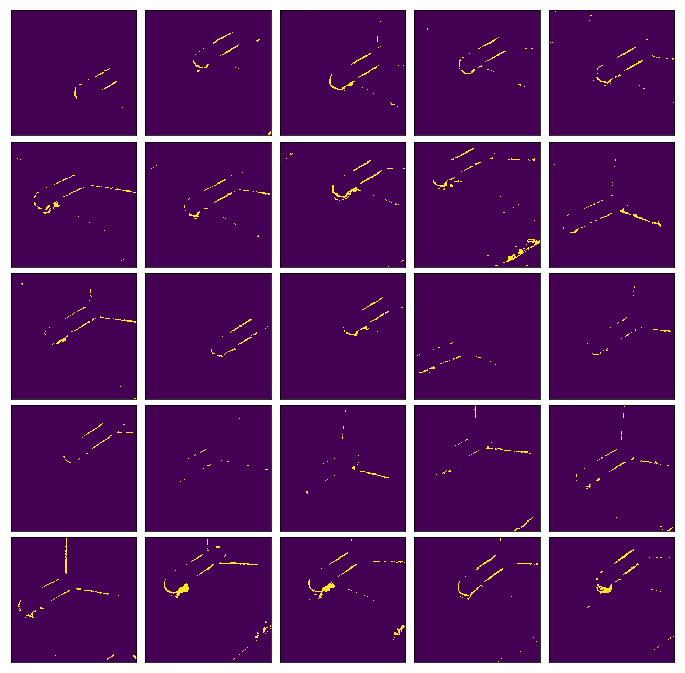

In [155]:
if True:
    plt.figure(figsize=(12,12))
    import matplotlib.gridspec as gridspec
    gs1 = gridspec.GridSpec(5, 5)
    gs1.update(wspace=0.025, hspace=0.05)

    for i in range(25):
        a = plt.subplot(gs1[i])
        a.get_xaxis().set_visible(False)
        a.get_yaxis().set_visible(False)
        f = fs[i+1]
        f = f[i00:i01, i10:i11, :]
        fh = cv2.cvtColor(f, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(fh, (0,0,0), (100,255,40))
        plt.imshow(mask)


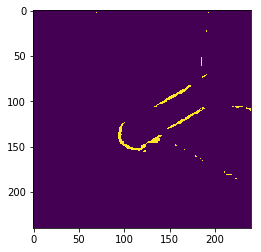

In [156]:
f = fs[3]
f = f[i00:i01, i10:i11, :]
fh = cv2.cvtColor(f, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(fh, (0,0,0), (100,255,40))
plt.imshow(mask)


array([[[128, 145, 139, 138]],

       [[ 94, 137, 101, 150]],

       [[149,  98, 172,  83]],

       [[148, 130, 160, 123]],

       [[160, 125, 172, 116]],

       [[133, 106, 147,  97]],

       [[168, 120, 180, 111]],

       [[141, 103, 152,  94]]], dtype=int32)

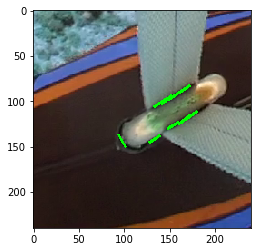

In [191]:
import cv2
import numpy as np

minLineLength = 20
maxLineGap = 10
lines = cv2.HoughLinesP(mask,1,np.pi/45,5,minLineLength,maxLineGap)
fk = f.copy()
for j in range(len(lines)):
    for x1,y1,x2,y2 in lines[j][:]:
        cv2.line(fk,(x1,y1),(x2,y2),(0,255,0),2)
plt.imshow(fk)
lines

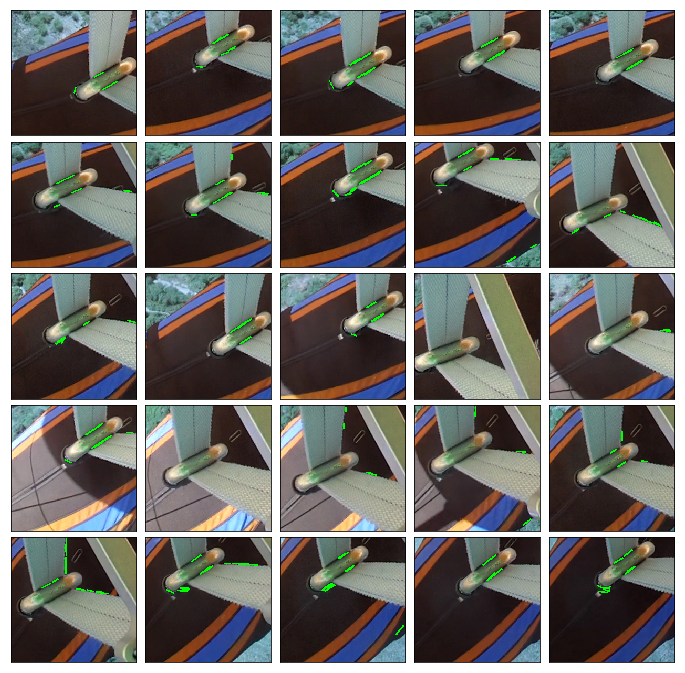

In [196]:
if True:
    plt.figure(figsize=(12,12))
    import matplotlib.gridspec as gridspec
    gs1 = gridspec.GridSpec(5, 5)
    gs1.update(wspace=0.025, hspace=0.05)

    for i in range(25):
        a = plt.subplot(gs1[i])
        a.get_xaxis().set_visible(False)
        a.get_yaxis().set_visible(False)
        f = fs[i+1]
        f = f[i00:i01, i10:i11, :]
        fh = cv2.cvtColor(f, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(fh, (0,0,0), (100,255,40))
        lines = cv2.HoughLinesP(mask,1,np.pi/45,5,minLineLength,maxLineGap)
        fk = f.copy()
        if lines is not None:
            for j in range(len(lines)):
                for x1,y1,x2,y2 in lines[j][:]:
                    cv2.line(fk,(x1,y1),(x2,y2),(0,255,0),2)
        plt.imshow(fk)


191.050978722
163.479737792
186.864168894
196.0
161.085678035
196.8
169.004130244


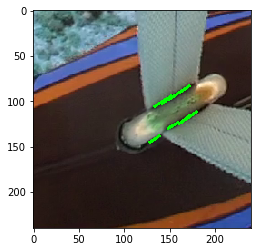

In [217]:
import math
f = fs[3]
f = f[i00:i01, i10:i11, :]
fh = cv2.cvtColor(f, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(fh, (0,0,0), (100,255,40))
lines = cv2.HoughLinesP(mask,1,np.pi/45,5,minLineLength,maxLineGap)
fk = f.copy()
for l in lines:
    x1,y1,x2,y2 = l[0]
    vx, vy = x2-x1, y2-y1
    lng, ang = math.hypot(vx, vy), math.degrees(math.atan2(vy, vx))
    #print(lng, ang)
    if abs(ang + 38)<10:
        cv2.line(fk,(x1,y1),(x2,y2),(0,255,0),2)
        if vx < 0:
            vx, vy = -vx, -vy
        perpd = -(vy*x1 - vx*y1)/lng
        print(perpd)
plt.imshow(fk)


In [224]:
# now attempt to process all frames and get the perpd lists from them
i00, i01, i10, i11 = 600, 840, 440, 680
cap.open(videoFile)
perpds = [ ]
while True:
    r, rf = cap.read()
    if not r:
        break
    f = rf[i00:i01, i10:i11, :]
    fh = cv2.cvtColor(f, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(fh, (0,0,0), (100,255,40))
    lines = cv2.HoughLinesP(mask,1,np.pi/45,5,minLineLength,maxLineGap)
    fk = f.copy()
    perpds.append([])
    if lines is not None:
        for l in lines:
            x1,y1,x2,y2 = l[0]
            vx, vy = x2-x1, y2-y1
            lng, ang = math.hypot(vx, vy), math.degrees(math.atan2(vy, vx))
            #print(lng, ang)
            if abs(ang + 38)<10:
                cv2.line(fk,(x1,y1),(x2,y2),(0,255,0),2)
                if vx < 0:
                    vx, vy = -vx, -vy
                perpd = -(vy*x1 - vx*y1)/lng
                perpds[-1].append(perpd)


TypeError: 'NoneType' object is not subscriptable

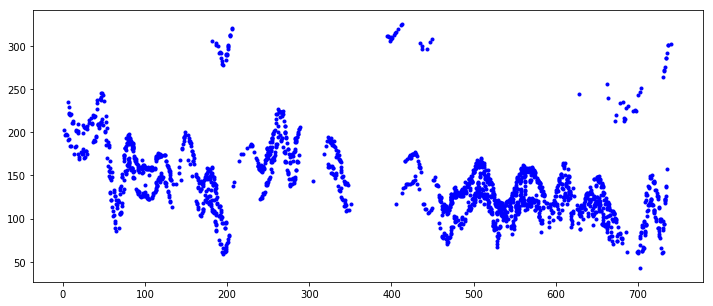

In [229]:
plt.figure(figsize=(12,5))
for i, ppd in enumerate(perpds):
    plt.scatter([i]*len(ppd), ppd, marker=".", color="blue")

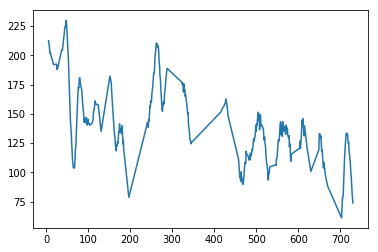

In [247]:
xs = [ ]
ys = [ ]
for i, ppd in enumerate(perpds):
    if ppd:
        if 25 < max(ppd) - min(ppd) < 55:
            xs.append(i)
            #ys.append(max(ppd) - min(ppd))
            ys.append((max(ppd)+min(ppd))/2)
            
plt.plot(xs, ys)


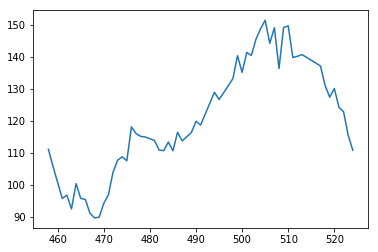

In [249]:
xs = [ ]
ys = [ ]
for i, ppd in enumerate(perpds):
    if ppd:
        if 450<i<525 and 25 < max(ppd) - min(ppd) < 55:
            xs.append(i)
            #ys.append(max(ppd) - min(ppd))
            ys.append((max(ppd)+min(ppd))/2)
            
plt.plot(xs, ys)


In [250]:
#frame 470 left, frame 510 right and going back
470/30, 510/30

(15.666666666666666, 17.0)

In [252]:
200/30, 270/30

(6.666666666666667, 9.0)